
## Starting off

If I were to pick a random person off of the street and asked you to predict what their weight will be, what would you guess? Why?  

I were only to pick from people who are 6'6", whatt would you guess is their weight? Is this the same or different? Why?

# Simple Linear Regression

**Regression analysis** is a tool to investigate how independent variables are related to a dependent varliable. For example, one may wish to use a person's height, gender, race, etc. to predict a person's weight. 


**Response Variable**
- Denoted, Y, is also called the target variable  or dependent variable. In the example, weight is the response variable.

**Predictor Variable**
- Denoted, X, is also called the explanatory variable or independent variable. In the example, height is the predictor.



To use known information to provide a better estimate, we need to understand how the dependent and independent variables are related. In statistics, we can describe how variables are related using a mathematical function. The function along with other assumptions is called a model.  


---

In [6]:
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')

In [7]:
#read in height weight data
weight_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

In [8]:
weight_df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


## Objectives: 

- Use plots and summary statistics to describe the relationship between the response variable and the predictor variable.
- Apply the regression model and interpret the results.
- Perform a hypothesis test for the population correlation.
- Know the assumptions and limitations of a linear regression model.


## Setting the stage
In order to create a model that can make predictions for unseen data, we need to understand the relationship between the target variable and the explanatory variable.

For a brief review of linear functions, recall that the equation of a line has the following form:
$$y=mx+b$$

where $m$ is the slope and $b$ is the y-intercept.



<img src="slope-equation.png" style="width:400px;" >

Given two points on a line, ($x_1$ and $y_1$) and ($x_2$ and $y_2$) , the slope is calculated by:

\begin{align} m&=\dfrac{y_2-y_1}{x_2-x_1}\\&=\dfrac{\text{change in y}}{\text{change in x}}\\&=\frac{\text{rise}}{\text{run}} \end{align}

In order to be confident that our model will represent the relationship between two variables, we need to be sure there is a linear relationship between the two.  Let's examine the data for a linear relationship.

### Question:

If we want to visually examine if there is relationship between two continuous variables what type of graphic should we use?

In [5]:
#create a scatterplot of the budget and gross for the movie df

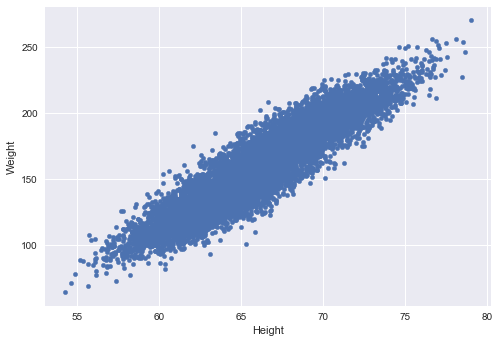

In [9]:
##code here

weight_df.plot.scatter(x='Height', y='Weight')

### Question:  

If we want to provide a measure of the strength of the linear relationship between two quantitative variables, what is the name of the measure we would like to use?



___

### Sample Correlation Coefficient

The sample correlation coefficient is typically denoted as $r$. It is also known as Pearson’s $r$. The population correlation coefficient is generally denoted as  $\rho_1$, pronounced “rho.”


The sample correlation coefficient, $r$, is calculated using the following formula:

$$r=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum (x_i-\bar{x})^2}\sqrt{\sum (y_i-\bar{y})^2}}$$

<img src='http://www.cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width="900">

In [7]:
#calculate correlation coefficient for data

pearsonr(weight_df['Weight'], weight_df['Height'])

(0.9247562987409146, 0.0)

In [4]:
weight_df.corr() #another way to calculate multiple

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


## Simple Linear Regression Model

<img src="https://www.stevejburr.com/post/2019-03-27-scatter-plots-and-best-fit-lines_files/figure-html/unnamed-chunk-2-1.png" width="600" >



The general form of the simple linear regression model is...

$$Y=\beta_0+\beta_1X+\epsilon$$

For an individual observation,

$$y_i=\beta_0+\beta_1x_i+\epsilon_i$$

where,

$\beta_0$ is the population y-intercept,

$\beta_1$ is the population slope, and

$\epsilon_i$ is the error or deviation of $y_i$ from the line, $\beta_0+\beta_1x_i$.

[Deriving the least squares estimators of the slope and intercept (simple linear regression)](youtube.com/watch?v=ewnc1cXJmGA)

### Sample Slope
$\hat{\beta}_1=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2}$

### Sample Intercept

$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$

How do we know which line is the best fit?

**It is the line that minimizes our errors, also called residuals.**

### Residual
$\hat{\epsilon}_i=y_i-\hat{y}_i$ is the observed error, typically called the residual.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToATqP0jQd-VRjdo8cxNwfcqKoM3cw3b6FembVLP1ExpNLZbW0" width="500">

### Least Squares Line
The least squares line is the line for which the sum of squared errors of predictions for all sample points is the least.

$$SSR = \sum_{i=1}^n (\hat{y} - \bar{y})^2$$

## Fitting a Model in Python



In [5]:
# building a linear regression model using statsmodel 
lr_model = ols(formula='Weight~Height', data=weight_df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:46   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting the Model output

### Interpreting the slope of the regression equation,  $\hat{\beta}_1$ 
$\hat{\beta}_1$ represents the estimated increase in $Y$ per unit increase in $X$. Note that the increase may be negative which is reflected when $\hat{\beta}_1$ is negative.
 
### Interpreting the intercept of the regression equation, $\hat{\beta}_0$
$\hat{\beta}_0$ is the -intercept of the regression line. When $X=0$ is within the scope of observation, $\hat{\beta}_0$ is the estimated value of $Y$ when $X=0$ .

In [9]:
## write a sentence that interprets the variable coefficient
# weight will increase by 7.7 lbs per inch in height**
#estimated increase in y per unit increwase in x

***Can you take the take the output of model summary and use it to rewrite the model with actual values?***

(*Replace the betas with numbers*)


In [ ]:
## write model here.
#𝑌=𝛽0+𝛽1𝑋+𝜖
#Y=-350.7+7.7




### Why is there a p-value for the coefficient

If we think about linear regression as a way to test if there is a relationship between two variables, then we can translate it to a hypothesis test:

$H_0\colon \beta_1=0$

$H_a\colon \beta_1\ne0$

With this in mind, how would you interpret the p-value in this output?

In [ ]:
## write your sentence here
#null is that height doesn't effect weight
#the p value says that is it very improbable that the height would not effect the weight
#this is a statistically significant relationship between height and weight
#probability of getting 7.7 if true population parameter was 0 would be an extremely low probability
#so we reject 

### Assumptions for Simple Linear Regression
1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors**: There is not a relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors.
    - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors**: The residuals must be approximately normally distributed.
    - Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


4. **Equal variances**: The variance of the residuals is the same for all values of $X$.
    - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

<img src="slr_assumptions.jpg" style="width:600px;">

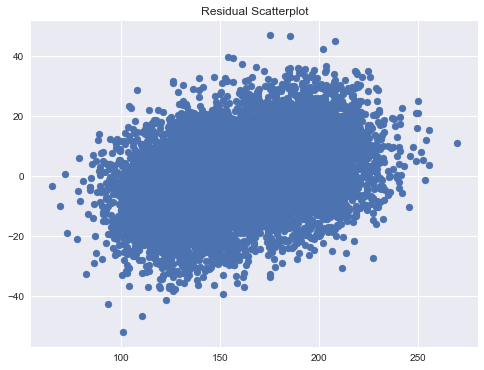

In [10]:
# checking for our model - Homoscedasticity,  Independence of residuals
pred_val = lr_model.fittedvalues.copy()
true_val = weight_df['Weight'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(weight_df['Weight'],residual)
ax.set_title('Residual Scatterplot')
plt.show()

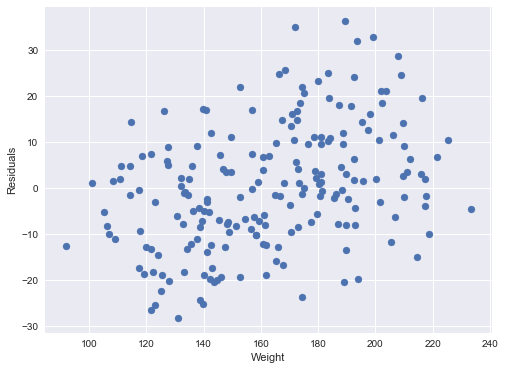

In [12]:
#taking a sample of the observations to more clearly evaluate the residuals
idx = np.random.choice(np.arange(len(pred_val)), 200, replace=False)
x_sample = weight_df['Weight'][idx]
y_sample = residual[idx]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_sample,y_sample)
ax.set_xlabel('Weight')
ax.set_ylabel('Residuals')

plt.show()

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-51.93373047, -46.70036118, -42.55403182, ...,  45.14088139,
          46.64602725,  46.84388996])),
 (12.221424481473655, -3.198387524611845e-13, 0.9998756760091045))

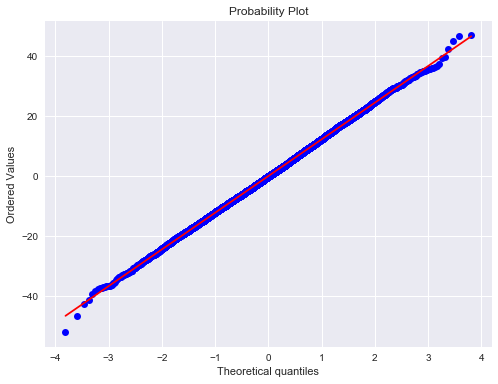

In [13]:
# checking for normality - QQ plot 

fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(residual, plot=ax, fit=True)

### Hypothesis Test for the Population Slope

The test statistic for the test of population slope is:
$t^*=\dfrac{\hat{\beta}_1}{\hat{SE}(\hat{\beta}_1)}$


where  $\hat{SE}(\hat{\beta}_1)$ is the estimated standard error of the sample slope . Under the null hypothesis and with the assumptions shown in the previous section,  $t^*$ follows a $t$-distribution with  $n-2$ degrees of freedom.

https://stattrek.com/regression/slope-confidence-interval.aspx?Tutorial=ap

___

## Cautions with Linear Regression

1. **Use extrapolation with caution.** 

Extrapolation is applying a regression model to X-values outside the range of sample X-values to predict values of the response variable . For example, you would not want to use a height of 12 inches height to predict the weight of a baby using a regression model that was fit to adult observations.

2. **The fact that there is no linear relationship (i.e. correlation is zero) does not imply there is no relationship altogether.** 

The scatter plot will reveal whether other possible relationships may exist. The figure below gives an example where X, Y are related, but not linearly related i.e. the correlation is zero.

<img src='https://statistics.laerd.com/spss-tutorials/img/pc/linear-non-linear.png' width="600">

### Outliers and Influential Observations
Influential observations are points whose removal causes the regression equation to change considerably.


https://www.desmos.com/calculator/jwquvmikhr